Исследование объявлений о продаже квартир

**Введение**

В рамках данного проекта был предоставлен архив данных сервиса Яндекс Недвижимость, содержащий объявления о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах за несколько лет. Основная цель работы — научиться точно определять рыночную стоимость объектов недвижимости. Для этого необходимо провести исследовательский анализ данных и выявить ключевые параметры, влияющие на стоимость жилья, что позволит в дальнейшем создать автоматизированную систему для мониторинга цен, которая будет способна отслеживать аномалии и выявлять возможную мошенническую деятельность на рынке.

Доступные данные включают как информацию, введенную пользователями (например, количество комнат, площадь квартиры), так и данные, автоматически полученные на основе картографических сервисов. Такие параметры, как расстояние до центра города, аэропортов, парков и водоемов, были рассчитаны автоматически, что дает возможность проанализировать влияние этих факторов на стоимость недвижимости.

**Цель работы**

Цель исследования — установить ключевые параметры, оказывающие наибольшее влияние на рыночную стоимость квартир, для будущей разработки автоматизированной систему для оценки объектов недвижимости. Такая система поможет не только отслеживать динамику цен, но и выявлять возможные аномалии в объявлениях, что в будущем сможет предотвратить мошенничество и обеспечить более прозрачный рынок недвижимости.

**План работы**

1. **Предварительный анализ данных**: Оценка структуры и качества предоставленных данных, выявление аномалий и выбросов. 
2. **Очистка данных**: Исправление и удаление выбросов для подготовки данных к дальнейшему анализу. Уточнение причин, по которым данные могут быть признаны некорректными.
3. **Исследовательский анализ данных (EDA)**: Выявление ключевых характеристик, влияющих на стоимость квартир. Определение корреляций между различными параметрами (например, площадь, количество комнат, удаленность от центра) и ценой недвижимости.
4. **Выводы**: Оценка результатов анализа для дальнейшего использования данных в системе.

**Описание данных**

Данные, доступные для анализа, можно условно разделить на два типа:

1. **Введенные пользователем данные**: 
   - Количество комнат
   - Общая площадь квартиры
   - Жилая площадь
   - Площадь кухни
   - Этаж, на котором находится квартира
   - Общее количество этажей в доме
   - Цена квартиры
   
2. **Автоматически полученные данные**:
   - Расстояние до центра города
   - Расстояние до аэропорта
   - Количество парков, водоемов и прочих объектов инфраструктуры рядом
   - Расстояние до ближайших социальных объектов (школ, детских садов)

Исходя из вышеуказанных данных, будет проведен анализ с целью выявления факторов, наибольшим образом влияющих на стоимость объектов недвижимости. После завершения анализа результаты могут быть использованы для построения системы, способной автоматически оценивать и мониторить рыночные цены.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

Выведем на экран первые строки нашего датафрейма:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Ознакомимся с общей информацией и типами данных:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице есть три столбца с названиями, которые требуют исправления для улучшения читаемости и согласованности:

- "floors_total" — лучше переименовать в "total_floors", чтобы быть более понятным и соответствовать другим столбцам.
- "cityCenters_nearest" — лучше переименовать в "city_center_nearest", чтобы привести к единому стилю написания (в единственном числе, как "airports_nearest").
- "first_day_exposition" — можно переименовать в "first_day_on_market", чтобы сделать более очевидным, что это дата первого дня публикации объявления.
- "days_exposition" — можно заменить на 'days_on_market', чтобы было очевиднее, что речь идет о времени нахождения объекта на рынке.
- "parks_around3000" - лучше переименовать на "parks_around_3000" для лучшей читабельности и единого стиля написания.
- "ponds_around3000" - лучше переименовать на "ponds_around_3000" для лучшей читабельности и единого стиля написания.

Исправленные названия сделают столбцы более интуитивно понятными и согласованными с общим неймингом данных.


In [5]:
# Переименование столбцов
data = data.rename(columns={
    'floors_total': 'total_floors',
    'cityCenters_nearest': 'city_center_nearest',
    'first_day_exposition': 'first_day_on_market',
    'days_exposition': 'days_on_market',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
    
})

# Проверим результат
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_on_market',
       'rooms', 'ceiling_height', 'total_floors', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_on_market'],
      dtype='object')


Для наглядного восприятия данных построим гистограммы для всех показателей:

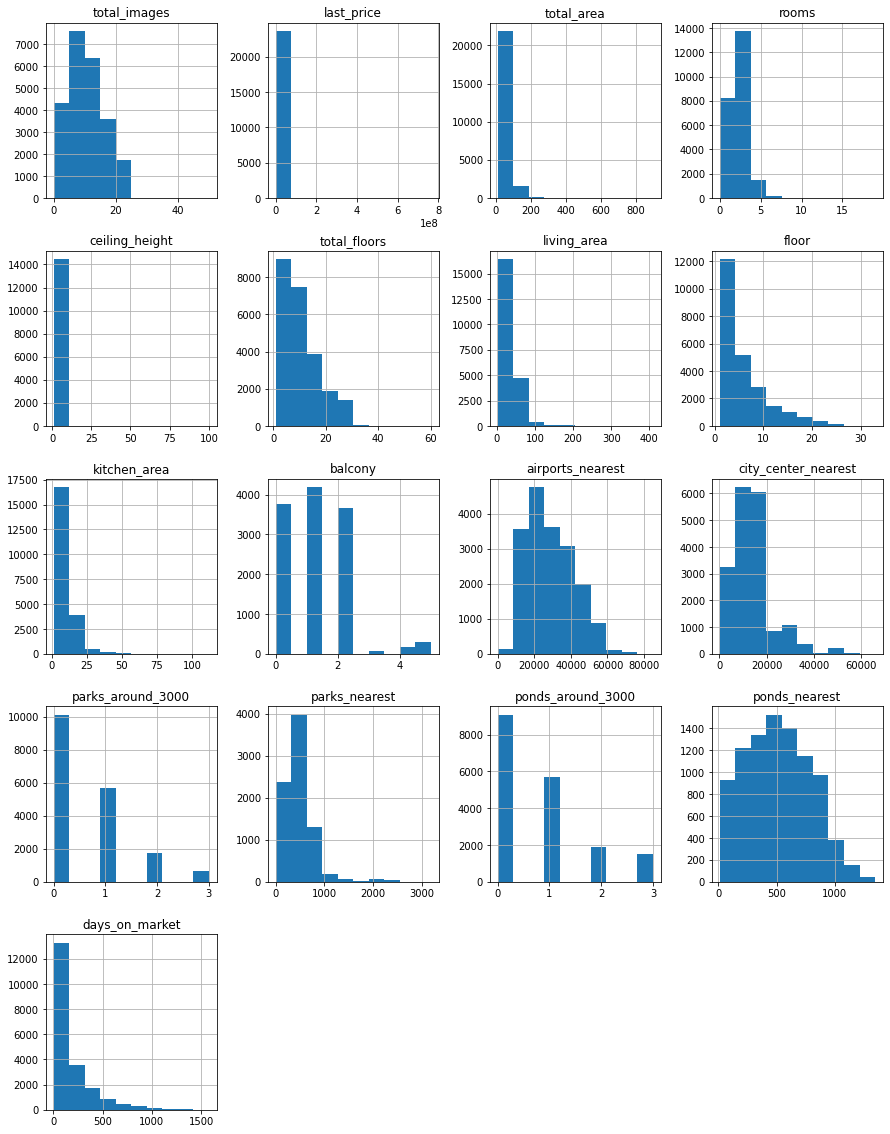

In [6]:
# Построение гистограммы для всех числовых столбцов
data.hist(figsize=(15, 20))

# Отображение графика
plt.show()

Предварительно - видим ненормальное распределние в части данных. Далее нам предстоит с этим разобраться.

### Выполните предобработку данных

Для начала нам необходимо проверить и исключить явные дубликаты в DataFrame, для этого используем следующие шаги:

Проверка на наличие дубликатов — используем метод duplicated() для поиска строк, которые повторяются.
Удаление дубликатов — используем метод drop_duplicates() для удаления дублирующихся строк.

In [7]:
# Проверяем количество дубликатов
duplicate_rows = data.duplicated().sum()
print(f'Количество дубликатов: {duplicate_rows}')

# Удаляем дубликаты
data = data.drop_duplicates()

# Проверяем, что дубликаты удалены
duplicate_rows_after = data.duplicated().sum()
print(f'Количество дубликатов после удаления: {duplicate_rows_after}')

Количество дубликатов: 0
Количество дубликатов после удаления: 0


Поскольку количество дубликатов в данных равно нулю как до, так и после попытки их удаления, можно сделать следующие выводы:

1. Отсутствие явных дубликатов: В датафрейме нет строк, которые полностью повторяются, что подтверждает уникальность каждой записи и указывает на хорошее качество данных на этом уровне.

2. Необходимость анализа неявных дубликатов: Поскольку явные дубликаты отсутствуют, следующим шагом будет проверка и устранение неявных дубликатов, таких как вариации в названии местности в столбце `locality_name`.

Теперь нам нужно получить список уникальных названий в столбце `locality_name` и проверить их на наличие неявных дубликатов.

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
data['locality_name'].nunique()

364

Видим, что в данных встречаются неявные дубликаты: «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Для начала заменим букву Ё на Е. Далее все названия, не являющиеся городом, (деревня, поселок, село и т.д. ) переименуем в одну категорию - ПГТ.

In [10]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace([
        'поселок городского типа имени',
        'поселок при железнодорожной станции',
        'поселок станции',
        'поселок городского типа', 
        'деревня', 
        'городской поселок',
        'коттеджный поселок', 
        'поселок',
        'село',
        'городского типа'
    ], 'ПГТ', regex=True)
    .str.strip() 
)

Выведем список уникальных значений после внесенных изменений:

In [11]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'ПГТ Агалатово', 'ПГТ Александровская',
       'ПГТ Алексеевка', 'ПГТ Аннино', 'ПГТ Аро', 'ПГТ Барышево',
       'ПГТ Батово', 'ПГТ Бегуницы', 'ПГТ Белогорка', 'ПГТ Белоостров',
       'ПГТ Большая Вруда', 'ПГТ Большая Ижора', 'ПГТ Большая Пустомержа',
       'ПГТ Большие Колпаны', 'ПГТ Большое Рейзино', 'ПГТ Большой Сабск',
       'ПГТ Бор', 'ПГТ Борисова Грива', 'ПГТ Бугры', 'ПГТ Будогощь',
       'ПГТ Ваганово', 'ПГТ Важины', 'ПГТ Вартемяги', 'ПГТ Вахнова Кара',
       'ПГТ Вещево', 'ПГТ Виллози', 'ПГТ Вознесенье', 'ПГТ Возрождение',
       'ПГТ Войсковицы', 'ПГТ Войскорово', 'ПГТ Володарское',
       'ПГТ Вырица', 'ПГТ Выс

In [12]:
data['locality_name'].sort_values().nunique()

311

Отлично! Неявные дубликаты устранены, общее количетство уникальных locality_name сократилось с 364 до 311.

Для начала работы с данными определим наличие и количество пропущенных данных в каждом столбце датафрейма:

In [13]:
data.isna().sum().sort_values()

total_images               0
open_plan                  0
floor                      0
rooms                      0
studio                     0
total_area                 0
last_price                 0
first_day_on_market        0
locality_name             49
total_floors              86
living_area             1903
kitchen_area            2278
days_on_market          3181
ponds_around_3000       5518
parks_around_3000       5518
city_center_nearest     5519
airports_nearest        5542
ceiling_height          9195
balcony                11519
ponds_nearest          14589
parks_nearest          15620
is_apartment           20924
dtype: int64

Выведем визуальную интерпретацию количества пропусков, для понимания в каких столбцах наиболее много пропущенных значений:

In [14]:
# Выведем долю пропущенных значений для каждого столбца датафрейма
pd.DataFrame(data.isna().mean().sort_values() * 100).style.background_gradient("coolwarm")

,0
total_images,0.000000
open_plan,0.000000
floor,0.000000
rooms,0.000000
studio,0.000000
total_area,0.000000
last_price,0.000000
first_day_on_market,0.000000
locality_name,0.206760
total_floors,0.362885


В данной таблице содержатся пропущенные значения в различных параметрах объявлений о продаже квартир. Можно сделать следующие логические предположения о природе этих пропусков:

1. **ceiling_height (высота потолков)**: Пропуски могут быть связаны с тем, что продавцы не знают точную высоту потолков, особенно если квартира старая или данные изначально не были указаны в документации. Этот параметр не всегда важен для покупателей, поэтому его могли пропустить.

2. **total_floors (общее количество этажей в доме)**: Пропуски здесь редки (всего 86), возможно, они связаны с тем, что продавец не указал эту информацию по ошибке или не счел данное поле обязательным.

3. **living_area (жилая площадь)**: Пропуски могут быть вызваны тем, что продавец не имеет точной информации о жилой площади или не указал её, считая этот параметр второстепенным.

4. **is_apartment (является ли объект апартаментами)**: Пропуски, вероятно, означают, что продавец просто не отметил этот параметр, считая его несущественным. Скорее всего, большая часть квартир не являются апартаментами, и значение можно заполнить как «Нет» (false).

5. **kitchen_area (площадь кухни)**: Пропуски могут свидетельствовать о том, что продавец не знает точную площадь кухни, особенно в случае старых квартир или квартир с объединенной кухней и гостиной (студии).

6. **balcony (наличие балкона)**: Пропуски здесь могут означать, что у квартиры просто нет балкона. Логично предположить, что если информация о балконе не указана, то его нет, и заменить пропуски на 0.

7. **locality_name (название населённого пункта)**: Пропуски могут свидетельствовать о том, что продавец забыл или не счёл важным указать название населённого пункта. В таком случае эти данные трудно восстановить.

8. **airports_nearest (расстояние до ближайшего аэропорта)** и **city_center_nearest (расстояние до центра города)**: Пропуски могут указывать на отсутствие данных о точном местоположении квартиры или на то, что эти параметры не были измерены. Восстановить эти данные без геолокации сложно.

9. **parks_around_3000 (парки в радиусе 3000 м)** и **ponds_around_3000 (водоёмы в радиусе 3000 м)**: Пропуски могут указывать на отсутствие данных об окружающей инфраструктуре или на то, что продавец не счёл нужным их указывать. Если информации нет, то логично оставить эти поля пустыми.

10. **parks_nearest (расстояние до ближайшего парка)** и **ponds_nearest (расстояние до ближайшего водоёма)**: Аналогично, пропуски здесь могут быть связаны с тем, что эта информация просто не указана, или с отсутствием таких объектов вблизи квартиры.

11. **ddays_on_market (количество дней на экспозиции)**: Пропуски могут означать, что данные по времени продажи не были обновлены, либо квартира всё ещё находится в продаже. Здесь можно оставить пропуски, так как они могут нести информацию о недавнем выставлении на продажу.

Таким образом, пропуски часто могут быть результатом отсутствия информации, невнимательности продавца или нерелевантности параметра. Там, где можно логически предположить значения (например, отсутствие балкона и является ли объект апартаментами), их можно заполнить.

Заполним пропуски в колонках **is_apartment** (является ли объект апартаментами) и  **balcony**(наличие балкона). Пропуски в этом поле можно заполнить значением False, так как логически можно предположить, что отсутсвие значения обозначает, что большинство квартир не являются апартаментами и не имеют балконов.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# проверим, что количество пропусков стало нулевым:
data['is_apartment'].isna().sum()

0

In [16]:
data['balcony'] = data['balcony'].fillna(0.0)
# проверим, что количество пропусков стало нулевым:
data['balcony'].isna().sum()

0

Кроме пропусков в полях **is_apartment** и **balcony**, есть ещё несколько случаев, где пропуски можно попытаться логически заполнить:

**total_floors (общее количество этажей в доме)**: заполним на основе информации о других квартирах в том же городе. Для этого определим похожие квартиры с такой же площадью в той же локации.

**Важный момент** - Чтобы дополнительно проверять, что общее количество этажей total_floors не меньше фактического этажа квартиры floor, добавим проверку непосредственно в функцию перед возвращением медианного значения. Если медианное значение меньше фактического этажа, возвращаем фактический этаж. В случае, если медианное значение по заданной локации отсутсвует, примем текущий этаж квартиры за последний.

In [17]:
# Функция для заполнения пропусков в total_floors с проверкой фактического этажа
def fill_total_floors(row, data):
    # Проверяем, если поле total_floors пустое
    if pd.isna(row['total_floors']):
        # Находим похожие дома в том же населенном пункте с такой же площадью
        similar_houses = data[(data['locality_name'] == row['locality_name']) &
                              (data['total_area'] == row['total_area']) &
                              (data['total_floors'].notna())]
        
        # Если есть похожие дома, находим медиану этажей
        if len(similar_houses) > 0:
            median_floors = round(similar_houses['total_floors'].median())
            
            # Если медиана этажей меньше фактического этажа квартиры, возвращаем фактический этаж
            if median_floors < row['floor']:
                return row['floor']
            else:
                return median_floors
    # Возвращаем текущее значение total_floors, если не найдено подходящее
    return row['total_floors']

# Применение функции ко всем строкам датафрейма
data['total_floors'] = data.apply(fill_total_floors, axis=1, data=data)

# Заполнение оставшихся пропусков: 
#Если после применения функции всё ещё остаются пропуски 
#(например, когда нет похожих домов для расчета медианы), 
#они будут заполнены значением из столбца floor с помощью fillna 

data['total_floors'] = data['total_floors'].fillna(data['floor'])


# Проверка количества пропусков позволяет убедиться, что пропусков больше нет.
data['total_floors'].isna().sum()

0

**living_area (жилая площадь)**:
   - **Заполнение на основе соотношения жилой площади к общей площади**: рассчитаем медианное соотношение жилой площади к общей площади для аналогичных квартир (в нашем случае с тем же количеством комнат) и используем его для заполнения пропусков. Заполним на основе медианного соотношения living_area к total_area для квартир с таким же количеством комнат.

In [18]:
# Заполнение living_area на основе соотношения к общей площади
def fill_living_area(row, data):
    if pd.isna(row['living_area']):
        similar_rooms = data[(data['rooms'] == row['rooms']) &
                           (data['living_area'].notna())]
        if len(similar_rooms) > 0:
            ratio = similar_rooms['living_area'] / similar_rooms['total_area']
            return round(row['total_area'] * ratio.median())
    return row['living_area']

data['living_area'] = data.apply(fill_living_area, axis=1, data=data)

data['living_area'].isna().sum()

0

**kitchen_area (площадь кухни)**:
   - **Заполнение на основе соотношения площади кухни к общей площади**: Подобно жилой площади,  используем медианнле соотношение площади кухни к общей площади для заполнения пропусков.

Эти подходы помогут более точно заполнить пропуски, используя имеющиеся данные, и минимизировать искажения. Однако даже такие заполнения могут не полностью отражать реальность, поэтому при дальнейшем анализе важно учитывать, что некоторые данные были сгенерированы искусственно. Заполним на основе среднего соотношения kitchen_area к total_area для квартир с таким же количеством комнат.

In [19]:
# Заполнение kitchen_area на основе соотношения к общей площади
def fill_kitchen_area(row, data):
    if pd.isna(row['kitchen_area']):
        similar_rooms = data[(data['rooms'] == row['rooms']) &
                           (data['kitchen_area'].notna())]
        if len(similar_rooms) > 0:
            ratio = similar_rooms['kitchen_area'] / similar_rooms['total_area']
            return round(row['total_area'] * ratio.median())
    return row['kitchen_area']

data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1, data=data)
data['kitchen_area'].isna().sum()
# Сохранение обработанных данных
# df.to_csv('processed_data.csv', index=False)

197

Проверим, в каких колонках все еще остались пропуски:

In [20]:
data.isna().sum()


total_images               0
last_price                 0
total_area                 0
first_day_on_market        0
rooms                      0
ceiling_height          9195
total_floors               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             197
balcony                    0
locality_name             49
airports_nearest        5542
city_center_nearest     5519
parks_around_3000       5518
parks_nearest          15620
ponds_around_3000       5518
ponds_nearest          14589
days_on_market          3181
dtype: int64

Для обработки пропусков в ceiling_height, воспользуемся медианной величиной высоты потолков по той же локации:

In [21]:
warnings.filterwarnings("ignore")

# перебираем каждый тип города в наборе уникальных значений столба locality_name
for d in data['locality_name'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в locality_name текущий тип locality (d) и есть пропуски в ceiling_height
    data.loc[(data['locality_name'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == d), 'ceiling_height'].median()
    # и записываем в них среднее значение time среди строк с текущим типом девайса (d)
data['ceiling_height'].isna().sum()

132

Оставшиеся пропуски на данном этапе оставляем без изменения. К ним мы вернемся чуть позже. Выведем финальную таблицу с данными о пропусках:

In [22]:
data.isna().sum().sort_values()

total_images               0
balcony                    0
open_plan                  0
is_apartment               0
floor                      0
living_area                0
studio                     0
rooms                      0
first_day_on_market        0
total_area                 0
last_price                 0
total_floors               0
locality_name             49
ceiling_height           132
kitchen_area             197
days_on_market          3181
parks_around_3000       5518
ponds_around_3000       5518
city_center_nearest     5519
airports_nearest        5542
ponds_nearest          14589
parks_nearest          15620
dtype: int64



**Промежуточный итог: анализ пропусков и методов их заполнения**

Пропуски в данных могут возникать по разным причинам, и для их корректного заполнения важно понимать, как это может повлиять на анализ. Сделаем summary по каждому случаю пропусков и использованному способу для их заполнения.

---

1. **`ceiling_height` (высота потолков)**:
   - **Причина пропусков**: В некоторых объектах высота потолков могла не указываться владельцами или отсутствовать в базе данных.
   - **Заполнение**: Пропуски заполнили медианным значением по квартирам в той же локации. Это хороший подход, так как в одном районе здания часто имеют схожие высоты потолков, и медианное значение снижает влияние экстремальных случаев. Оставшиеся пропуски заменили на unknown.

---

2. **`total_floors` (общее количество этажей в доме)**:
   - **Причина пропусков**: Информация могла отсутствовать для некоторых объектов недвижимости из-за проблем с базой данных или неполной информацией о доме.
   - **Заполнение**: Пропуски заполнили медианным значением по квартирам в той же локации с аналогичной площадью, так как количество этажей в домах одного района часто совпадает. Оставшиеся пропуски заменили на unknown.

---

3. **`living_area` (жилая площадь)**:
   - **Причина пропусков**: Пропуски могли возникнуть, если данные о жилой площади не были предоставлены владельцами или автоматическая система не подтянула эту информацию.
   - **Заполнение**: Пропуски в этом поле заполняем на основе соотношения жилой площади к общей площади. Для аналогичных квартир (например, с тем же количеством комнат) вычисляем медианное соотношение `living_area / total_area` и используем это значение для заполнения пропусков. Это позволяет минимизировать искажения в данных, хотя такое заполнение не может полностью заменить реальные значения.

---

4. **`kitchen_area` (площадь кухни)**:
   - **Причина пропусков**: Владельцы могли не указать площадь кухни, либо она не была доступна в автоматической системе.
   - **Заполнение**: Пропуски заполняем на основе медианного соотношения площади кухни к общей площади для аналогичных квартир. Например, рассчитываем медианное соотношение `kitchen_area / total_area` для квартир с таким же количеством комнат. Это позволяет учесть типичные размеры кухни для квартир с одинаковым количеством комнат и снизить искажения в данных. Оставшиеся пропуски заменили на unknown.

---

5. **`is_apartment` (является ли объект апартаментами)**:
   - **Причина пропусков**: Владельцы могли не указывать эту информацию, если квартира не является апартаментами.
   - **Заполнение**: Пропуски заполнили значением `False`, предполагая что большинство квартир не являются апартаментами. Это предположение имеет место быть, так как апартаменты представляют собой менее распространённый тип недвижимости.

---

6. **`balcony` (наличие балкона)**:
   - **Причина пропусков**: Отсутствие данных может означать, что балкон отсутствует.
   - **Заполнение**: Пропуски заполняем значением `0`, предполагая, что если данные о балконе не указаны, то его нет.

---

7. **`locality_name` (название населённого пункта)**:
   - **Причина пропусков**: Пропуски могли возникнуть, если информация о населенном пункте была недоступна, особенно для новых объектов или удалённых районов.
   - **Заполнение**: Пропуски оставляем, так как название населённого пункта уникально и его сложно логически заполнить.

---

8. **`airports_nearest` (расстояние до ближайшего аэропорта)** и **`city_center_nearest` (расстояние до центра города)**:
   - **Причина пропусков**: Эти данные могли отсутствовать из-за проблем с геолокационными данными или недоступностью информации.
   - **Заполнение**: Пропуски оставляем.

---

9. **`parks_around_3000` (количество парков в радиусе 3000 м)** и **`ponds_around_3000` (количество водоёмов в радиусе 3000 м)**:
   - **Причина пропусков**: Пропуски могли возникнуть, если информация о парках и водоёмах в базе данных отсутствовала или не была полностью заполнена.
   - **Заполнение**: Пропуски  оставляем.
---

10. **`parks_nearest` (расстояние до ближайшего парка)** и **`ponds_nearest` (расстояние до ближайшего водоёма)**:
    - **Причина пропусков**: Пропуски могут быть связаны с отсутствием парков или водоёмов в непосредственной близости от объекта или недостаточной информацией в системе.
    - **Заполнение**: Эти пропуски также оставляем.
---

11. **`days_on_market` (количество дней на экспозиции)**:
    - **Причина пропусков**: Пропуски могут возникать, если объект недавно был выставлен на продажу или если данные не были обновлены.
    - **Заполнение**: Эти пропуски лучше оставить, так как они могут нести важную информацию о статусе объекта и его рыночной активности.

---

### Заключение:

- Пропуски в столбцах **`ceiling_height`** и **`total_floors`** успешно заполнены медианными значениями по квартирам в тех же локациях, что снижает искажения и сохраняет актуальность данных.
- Пропуски в полях **`living_area`** и **`kitchen_area`** заполнены на основе медианного соотношения этих площадей к общей площади для аналогичных квартир с тем же количеством комнат. Это позволяет более точно заполнить данные, хотя и с некоторой степенью приближённости.
- Пропуски в поле **`is_apartment`** заполнены значением `False`, а в поле **`balcony`** — значением `0`, что является логичным предположением для этих полей.
- Остальные пропуски лучше оставить.

Эти подходы к заполнению пропусков помогают сохранить как можно больше данных, при этом минимизируя искажения в них. Однако важно помнить, что некоторые значения сгенерированы искусственно, и это может повлиять на результаты дальнейшего анализа.

**Вернемся к типам данных в каждом столбце:**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_images         23699 non-null  int64  
 1   last_price           23699 non-null  float64
 2   total_area           23699 non-null  float64
 3   first_day_on_market  23699 non-null  object 
 4   rooms                23699 non-null  int64  
 5   ceiling_height       23567 non-null  float64
 6   total_floors         23699 non-null  float64
 7   living_area          23699 non-null  float64
 8   floor                23699 non-null  int64  
 9   is_apartment         23699 non-null  bool   
 10  studio               23699 non-null  bool   
 11  open_plan            23699 non-null  bool   
 12  kitchen_area         23502 non-null  float64
 13  balcony              23699 non-null  float64
 14  locality_name        23650 non-null  object 
 15  airports_nearest     18157 non-null 

В представленном DataFrame есть несколько типов данных, которые стоит изменить для упрощения работы с ними. 

**`first_day_on_market` (object → datetime)**
   - **Почему нужно изменить**: этот столбец содержит данные о дате, и текущий тип данных (`object`) не оптимален для хранения дат. Тип данных `datetime64` позволит эффективно работать с датами и проводить операции над ними, такие как фильтрация по времени или вычисление разницы между датами.

In [24]:
data['first_day_on_market'] = pd.to_datetime(data['first_day_on_market'], format='%Y-%m-%dT%H:%M:%S')

 **`total_floors` (float64 → int64)**
   - **Почему нужно изменить**: количество этажей не может быть дробным числом, это целое значение. Текущий тип данных `float64` занимает больше памяти, чем тип `int64`, который лучше подходит для хранения целых значений.

In [25]:
data['total_floors'] = data['total_floors'].astype(int)

**`balcony` (float64 → int64)**
   - **Почему нужно изменить**: количество балконов — это целочисленное значение, которое также не может быть дробным. Можно преобразовать этот столбец в `int64`.

In [26]:
data['balcony'] = data['balcony'].astype(int)

 Необходимость изменения типов данных и корректировка пропусков:

1. **`airports_nearest`, `city_center_nearest`, `parks_nearest`, `ponds_nearest` (float64 → int64)**
   - **Причина изменения**: Эти столбцы содержат расстояния в метрах. Поскольку расстояние не может быть дробным в данном контексте, логично использовать целочисленный тип данных `int64`.

2. **`days_on_market` (float64 → int64)**
   - **Причина изменения**: Количество дней экспозиции является целым числом. Дробные значения для этого столбца неуместны, поэтому следует преобразовать его в целочисленный тип `int64`.

3. **`parks_around_3000`, `ponds_around_3000` (float64 → int64)**
   - **Причина изменения**: Количество парков и водоемов представлено целыми числами. Дробные значения здесь неуместны, поэтому столбцы следует преобразовать в целочисленный тип `int64`.

Порядок действий:

1. **Заполнение пропусков**: Пропуски в столбцах `airports_nearest`, `city_center_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around_3000`, и `ponds_around_3000` будут заменены на медианные значения по категориям `locality_name`. Это обеспечит более точное заполнение данных, учитывая специфику каждой локации. Если медианное значение не может быть определено (например, если все значения в категории пропущены), пропуски будут заменены на ноль.

2. **Изменение типа данных**: После заполнения пропусков, типы данных в указанных столбцах будут преобразованы в `int64`, чтобы соответствовать характеру хранимых данных.

Эти шаги помогут обеспечить корректность и консистентность данных для дальнейшего анализа.


In [27]:
columns_with_missing = [
    'parks_around_3000',
    'ponds_around_3000',
    'airports_nearest',
    'city_center_nearest',
    'parks_nearest',
    'ponds_nearest'
]

# Для каждой колонки заполняем пропуски медианным значением по группам 'locality_name'
for col in columns_with_missing:
    # Вычисляем медианные значения по каждой локальной группе
    median_values = data.groupby('locality_name')[col].transform('median')
    # Заполняем пропуски медианными значениями и нулями, если медианное значение отсутствует
    data[col] = data[col].fillna(median_values).fillna(0)
 

Заменяем тип данных:

In [28]:
columns_to_int = [

    'parks_around_3000',
    'ponds_around_3000',
    'airports_nearest',
    'city_center_nearest',
    'parks_nearest',
    'ponds_nearest',
    'days_on_market'
]

data[columns_to_int] = data[columns_to_int].fillna(0).astype(int)

Для столбца days_on_market мы вновь сталкиваемся с проблемой пропусков данных. Из-за нехватки информации о том, как именно следует заполнять пропущенные значения, мы не можем использовать среднее или медианное значение. В этом случае наиболее подходящим решением является замена пропусков на нули. Это решение позволяет избежать искажений данных, поскольку любое другое значение может быть неточным или необоснованным.

После замены пропусков нулями необходимо преобразовать тип данных столбца с `float64` на `int64`. Это связано с тем, что количество дней экспозиции является целым числом, и дробные значения не имеют смысла в данном контексте. Преобразование в целочисленный тип данных позволяет более корректно анализировать и обрабатывать данные.

Таким образом, порядок действий таков:

1. Заменить пропущенные значения в столбце "дни экспозиции" на нули.
2. Преобразовать тип данных столбца с `float64` на `int64`, чтобы обеспечить целочисленный формат и улучшить точность анализа данных.

In [29]:
data['days_on_market'] = data['days_on_market'].fillna(0).astype(int)

Убедимся, что тип данных в столбцах изменился:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   total_images         23699 non-null  int64         
 1   last_price           23699 non-null  float64       
 2   total_area           23699 non-null  float64       
 3   first_day_on_market  23699 non-null  datetime64[ns]
 4   rooms                23699 non-null  int64         
 5   ceiling_height       23567 non-null  float64       
 6   total_floors         23699 non-null  int64         
 7   living_area          23699 non-null  float64       
 8   floor                23699 non-null  int64         
 9   is_apartment         23699 non-null  bool          
 10  studio               23699 non-null  bool          
 11  open_plan            23699 non-null  bool          
 12  kitchen_area         23502 non-null  float64       
 13  balcony              23699 non-

Итоговые изменения:

- **`first_day_on_market`**: Изменили тип данных на `datetime64` для работы с датами.
- **`total_floors`, `balcony`**: Изменили тип данных на `int64` для хранения целых чисел.
- **`parks_around_3000`, `ponds_around_3000`, `airports_nearest`, `city_center_nearest`, `parks_nearest`, `ponds_nearest`**: Изменили тип данных на `Int64`,  заменив пропуски на медианные значения по `locality_name` или ноль, если медиана не определена.
- **`days_on_market`**: Заменили пропуски на нули и преобразовали тип данных на `Int64` для хранения целых чисел.

### Добавьте в таблицу новые столбцы

Добавьте в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).


In [31]:
data['price_per_metr'] = round(data['last_price'] / data['total_area'], 2)                                                 

In [32]:
data['week_day'] = data['first_day_on_market'].dt.weekday

In [33]:
data['month_exposition'] = data['first_day_on_market'].dt.month

In [34]:
data['year_exposition'] = data['first_day_on_market'].dt.year

In [35]:
def floor_category(row):
    floor = row['floor']
    total_floors = row['total_floors']
    
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

# Применяем функцию ко всем строкам 
data['floor_category'] = data.apply(floor_category, axis=1)


In [36]:
data['city_center_nearest_km'] = round(data['city_center_nearest']/1000)
data.head()

,total_images,last_price,total_area,first_day_on_market,rooms,ceiling_height,total_floors,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_on_market,price_per_metr,week_day,month_exposition,year_exposition,floor_category,city_center_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0,0,584,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,100.0,9,False,...,84,3,234,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000.00,1,6,2018,другой,8.0


В таблицу были добавлены новые столбцы со следующими параметрами: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «‎первый», «последний», «другой»); расстояние до центра города в километрах. Эти данные необходимы для проведения дальнейшего анализа.

### Проведите исследовательский анализ данных

Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров
Список параметров:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка


In [37]:
data[['rooms', 'ceiling_height', 'floor_category', 'total_floors', 'city_center_nearest', 'parks_nearest', 'total_area', 'living_area', 'kitchen_area', 'last_price']].describe()

,rooms,ceiling_height,total_floors,city_center_nearest,parks_nearest,total_area,living_area,kitchen_area,last_price
count,23699.000000,23567.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23502.000000,2.369900e+04
mean,2.070636,2.732402,10.681252,11476.034854,354.814971,60.348651,34.692196,10.489058,6.541549e+06
std,1.078405,1.004432,6.596448,9634.136386,290.459117,35.654083,22.837790,5.804486,1.088701e+07
min,0.000000,1.000000,1.000000,0.000000,0.000000,12.000000,2.000000,1.300000,1.219000e+04
25%,1.000000,2.550000,5.000000,3827.000000,0.000000,40.000000,18.800000,7.000000,3.400000e+06
50%,2.000000,2.700000,9.000000,11729.000000,460.000000,52.000000,30.000000,9.000000,4.650000e+06
75%,3.000000,2.700000,16.000000,15717.000000,460.000000,69.900000,42.400000,11.900000,6.800000e+06
max,19.000000,100.000000,60.000000,65968.000000,3190.000000,900.000000,430.000000,122.000000,7.630000e+08


На основе предоставленного описания данных можем сделать следующие предварительные выводы и заметить аномалии:

1. **Столбец `rooms`**:
   - Минимальное значение равно **0**, что некорректно, так как в квартире всегда должна быть хотя бы одна комната. Это может быть ошибка, и такие записи стоит либо удалить.
   - Максимальное значение равно **19**, что также кажется необычным. Возможно, это относится к ошибочным данным, поэтому следует проанализировать и, возможно, избавиться от таких данных.

2. **Столбец `ceiling_height` (высота потолков)**:
   - Минимальное значение **1 м**, что явно является аномалией (слишком низкий потолок).
   - Максимальное значение **100 м**, что также не может быть реальным для жилых помещений. Значения выше определенного порога(например 22 м) стоит разделить на 10, чтобы исправить ошибочные данные.
   
3. **Столбец `total_floors` (общее количество этажей в доме)**:
   - Минимальное значение **1** может указывать на частные дома, что корректно.
   - Максимальное значение **60** — это нормально для многоэтажных домов, хотя стоит обратить внимание на распределение данных, чтобы убедиться в их корректности.

4. **Столбцы `city_center_nearest` и `parks_nearest` (расстояние до центра города и ближайшего парка)**:
   - Минимальное значение **0** может означать, что объект расположен непосредственно рядом с центром города или парком, что возможно, но требует дополнительной проверки на корректность данных.
   - Максимальное значение для расстояния до центра **65,968 м** (почти 66 км) — это, скорее всего, крайний случай, который можно считать нормальным для удаленных объектов.

5. **Столбец `total_area` (общая площадь квартиры)**:
   - Минимальное значение **12 м²** — это слишком мало для жилого помещения, вероятно, это ошибка.
   - Максимальное значение **900 м²** — это аномалия для квартир, и, вероятно, такие данные стоит пересмотреть или скорректировать (например, ошибка с лишним нулем, 90 м²).

6. **Столбец `living_area` (жилая площадь)**:
   - Минимальное значение **2 м²** — что на практике невозможно для жилого помещения и явно является аномалией.
   - Максимальное значение **430 м²** также может быть аномалией или крайне редким случаем, требующим дополнительной проверки.

7. **Столбец `kitchen_area` (площадь кухни)**:
   - Минимальное значение **1.3 м²** — что, скорее всего, ошибка, так как кухня с такой площадью не функциональна.
   - Максимальное значение **122 м²** также кажется чрезмерным для жилых помещений.

8. **Столбец `last_price` (цена объекта)**:
   - Минимальная цена **12,190 руб** выглядит как ошибка, так как стоимость недвижимости не может быть настолько низкой.
   - Максимальная цена **763,000,000 руб** так же скорее всего является аномалией, т.к для рынка недвижимости это необычайно высокая стоимость.


Корректировка этих данных необходима для проведния корректного анализа.

Для установления логических границ нормальной общей площади квартиры можно предпринять следующие шаги:

1. **Минимальная площадь**: Установим минимальный порог площади квартиры на уровне 17 м². Все значения, ниже этого порога, будем считать некорректными и удалим их из анализа.

2. **Максимальная площадь**: Определим максимальную площадь квартиры как 200 м². Если площадь квартиры превышает этот показатель, это может указывать на ошибку в данных, например, на добавление лишнего нуля.

3. **Коррекция ошибок**: Для исправления значений, превышающих 200 м², предположим, что ошибка вызвана добавлением лишнего нуля. В таких случаях разделим площадь на 10. Например, если площадь составляет 900 м², она, вероятно, должна быть 90 м², что выглядит более реалистично.

4. **Коррекция связанных параметров**: После корректировки общей площади необходимо также скорректировать связанные параметры, чтобы сохранить их согласованность. Это включает в себя:
   - **Жилая площадь (`living_area`)**: Разделим её на 10 для значений, превышающих 200 м².
   - **Площадь кухни (`kitchen_area`)**: Также разделим её на 10 в случае необходимости.
   - **Цена (`last_price`)**: Корректируем цену, разделив её на 10 для соответствующих записей.

Так же пересчитаем значения столбца 'price_per_metr', которое в результате внесенных изменений могло стать некорректным.
Таким образом, внесение изменений в общую площадь квартиры будет сопровождаться корректировкой связанных параметров, что позволит сохранить целостность и правдоподобность данных.
Полученные данные сохраняем в новый датафрейм data_filtered.


In [38]:
warnings.filterwarnings("ignore")

data_filtered = data[data['total_area'] > 17]
data_filtered.loc[data_filtered['total_area'] > 200, ['total_area', 'living_area', 'kitchen_area','last_price']] /= 10
data_filtered['price_per_metr'] = round(data_filtered['last_price'] / data_filtered['total_area'], 2)                                                 

Проведем оценку параметров таблицы для дальнейшего анализа и исключения аномалий:

1. **Фильтрация по кухонной площади**:
Отбираем квартиры, у которых площадь кухни находится в адекватных пределах от 8 до 30 квадратных метров.
Площадь кухни менее 8 м² может быть слишком маленькой для нормальной функциональности, тогда как площадь более 30 м² может быть необычной для стандартных квартир. Этот фильтр помогает избавиться от аномальных значений и оставляет только реалистичные размеры кухни, соответствующие средним значениям на рынке недвижимости.


In [39]:
# Фильтрация по кухонной площади в диапазоне от 8 до 50
data_filtered = data_filtered.query('8 <= kitchen_area <= 30')


2. **Фильтрация по соблюдению общей площади квартиры**: Проверяем, что общая площадь квартиры (`total_area`) больше или равна сумме жилой площади (`living_area`) и площади кухни (`kitchen_area`).
   Логически, общая площадь квартиры должна быть достаточной для размещения жилой зоны и кухни. Если общая площадь меньше суммы этих двух зон, это указывает на ошибку в данных, так как общая площадь не может быть меньше суммы всех функциональных зон. Проверяется, чтобы общая площадь квартиры была не меньше суммы жилой площади и площади кухни. Этот фильтр гарантирует, что общая площадь квартиры адекватно соответствует размерам всех ее функциональных зон.


In [40]:
# Фильтрация по соблюдению общей площади квартиры
data_filtered = data_filtered.query('total_area >= (living_area + kitchen_area)')

3. **Фильтрация по цене**: Фильтруем данные для исключения квартир с экстремально низкими или высокими ценами, которые могут быть результатом ошибок при вводе данных или неадекватных оценок. Например, квартиры с ценой ниже 1,000,000 могут быть неправильно указаны, а цены выше 10,000,000 могут выходить за рамки рассматриваемого рынка.

In [41]:
# Фильтрация по цене в диапазоне от 1,000,000 до 10,000,000
data_filtered = data_filtered.query('1000000 <= last_price <= 10000000')

4. **Фильтрация по площади на одну комнату**: Площадь на одну комнату менее 8 м² может указывать на нереалистичные или переполненные квартиры, где условия проживания могут быть неудобными. Этот фильтр помогает исключить записи с чрезмерно маленькой площадью на одну комнату, что также может быть результатом ошибок в данных или неактуальных сведений.

In [42]:
# Фильтрация данных для обеспечения реалистичного распределения площади на комнаты
data_filtered = data_filtered.query('(total_area / rooms) >= 8')

Теперь необходимо провести коррекцию значений высоты потолков в данных:

1. **Коррекция значений**: Некоторые значения высоты потолков могут содержать ошибки, такие как лишние нули. Для исправления таких ошибок применим условие, которое делит значения в диапазоне от 22 до 35 метров на 10. Это преобразует их в реалистичный диапазон в метрах, обеспечивая правильное отображение высоты потолков.

2. **Фильтрация корректных значений**: Оставляем только те значения, которые находятся в диапазоне от 2.2 до 5 метров, так как они являются адекватными и реалистичными. Эти значения остаются без изменений.

3. **Исключение некорректных данных**: Значения, которые не соответствуют указанным диапазонам, заменяются на `None`. После этого удаляем строки с `None`, чтобы в данных остались только корректные значения.

In [43]:
# Применение корректировки высоты потолков с помощью лямбды
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].apply(lambda x: x / 10 if 22 <= x <= 35 else (x if 2.2 <= x <= 5 else None))
data_filtered = data_filtered[data_filtered['ceiling_height'].notna()]

С учетом проведенных корректировок можем построить графики для изучаемых параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

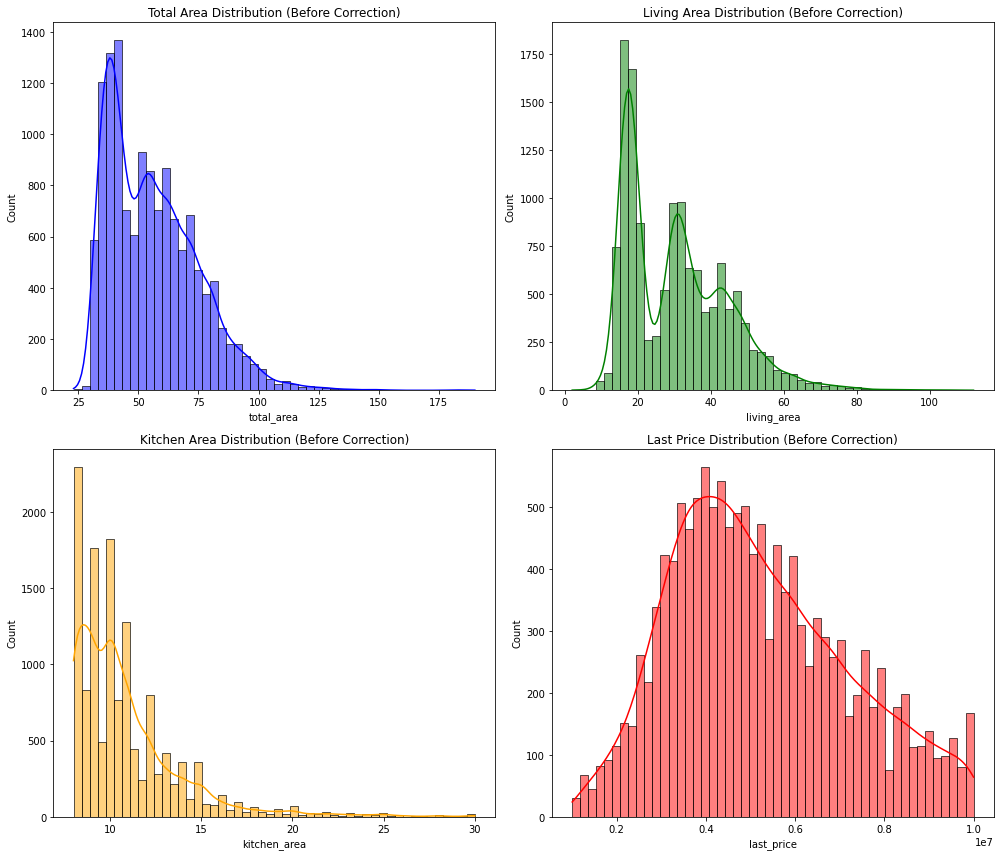

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Гистограммы
sns.histplot(data_filtered['total_area'], bins=50, ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title('Total Area Distribution (Before Correction)')

sns.histplot(data_filtered['living_area'], bins=50, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Living Area Distribution (Before Correction)')

sns.histplot(data_filtered['kitchen_area'], bins=50, ax=axes[1, 0], color='orange', kde=True)
axes[1, 0].set_title('Kitchen Area Distribution (Before Correction)')

sns.histplot(data_filtered['last_price'], bins=50, ax=axes[1, 1], color='red', kde=True)
axes[1, 1].set_title('Last Price Distribution (Before Correction)')




plt.tight_layout()
plt.show()

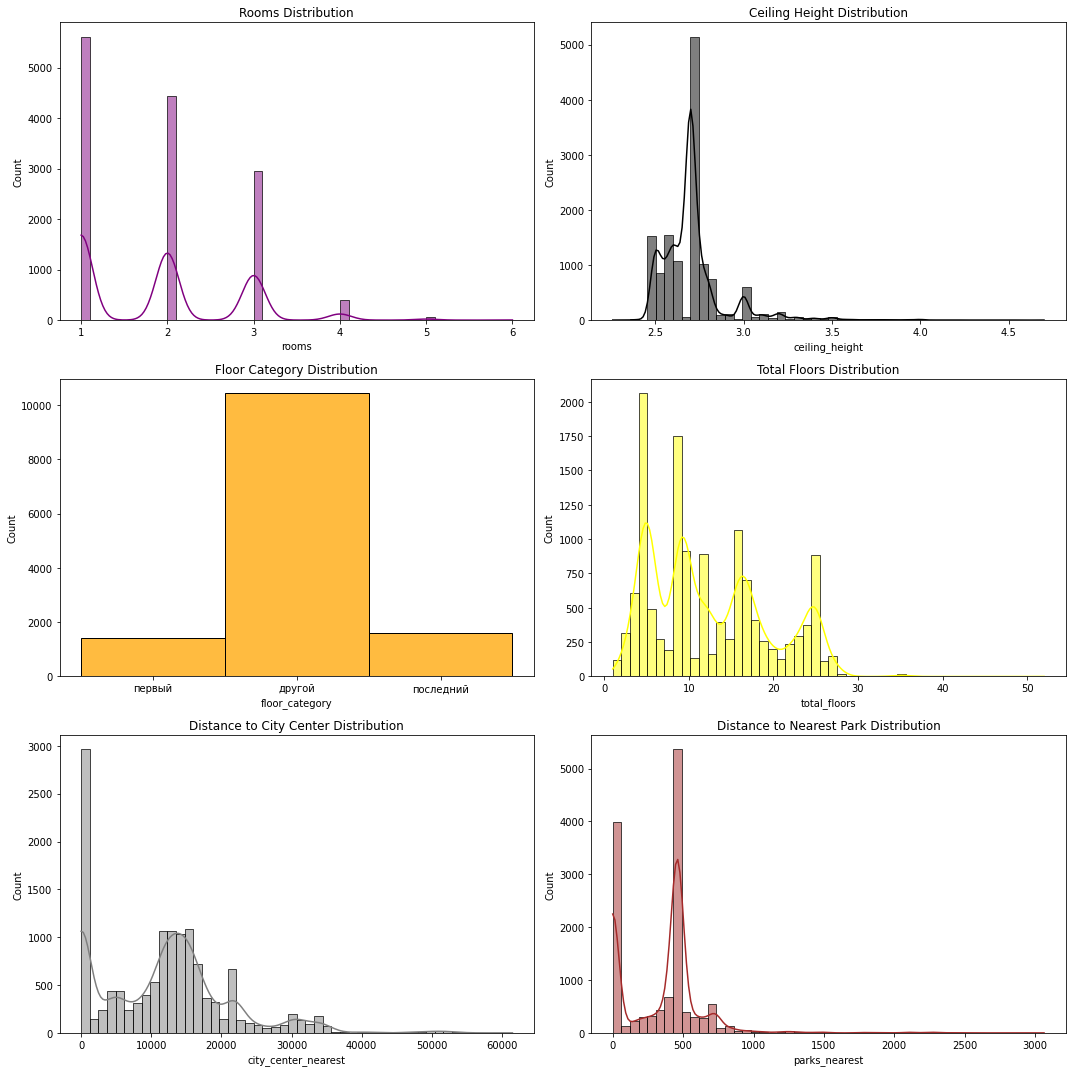

In [45]:
 #Настройка графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Гистограммы
sns.histplot(data_filtered['rooms'], bins=50, ax=axes[0, 0], color='purple', kde=True)
axes[0, 0].set_title('Rooms Distribution')

sns.histplot(data_filtered['ceiling_height'], bins=50, ax=axes[0, 1], color='black', kde=True)
axes[0, 1].set_title('Ceiling Height Distribution')

sns.histplot(data_filtered['floor_category'], bins=len(data_filtered['floor_category'].unique()), ax=axes[1, 0], color='orange', kde=False)
axes[1, 0].set_title('Floor Category Distribution')

sns.histplot(data_filtered['total_floors'], bins=50, ax=axes[1, 1], color='yellow', kde=True)
axes[1, 1].set_title('Total Floors Distribution')

sns.histplot(data_filtered['city_center_nearest'], bins=50, ax=axes[2, 0], color='gray', kde=True)
axes[2, 0].set_title('Distance to City Center Distribution')

sns.histplot(data_filtered['parks_nearest'], bins=50, ax=axes[2, 1], color='brown', kde=True)
axes[2, 1].set_title('Distance to Nearest Park Distribution')

# Настройка графиков
plt.tight_layout()
plt.show()

Выведем статистику для очищенных данных:

In [46]:
data_filtered[['rooms', 'ceiling_height', 'floor_category', 'total_floors', 'city_center_nearest', 'parks_nearest', 'total_area', 'living_area', 'kitchen_area', 'last_price']].describe()

,rooms,ceiling_height,total_floors,city_center_nearest,parks_nearest,total_area,living_area,kitchen_area,last_price
count,13472.000000,13472.000000,13472.000000,13472.000000,13472.000000,13472.000000,13472.000000,13472.000000,1.347200e+04
mean,1.879231,2.706412,12.539118,11804.654394,343.613346,56.021996,30.581428,10.892488,5.185736e+06
std,0.891672,0.185553,6.940126,9387.290404,288.470015,18.745504,13.910883,3.046925,1.979406e+06
min,1.000000,2.260000,1.000000,0.000000,0.000000,23.000000,2.000000,8.000000,1.000000e+06
25%,1.000000,2.600000,6.000000,3816.000000,0.000000,40.000000,18.000000,9.000000,3.700000e+06
50%,2.000000,2.700000,10.000000,12262.500000,460.000000,53.100000,29.700000,10.000000,4.900000e+06
75%,3.000000,2.720000,17.000000,16209.250000,460.000000,68.000000,40.000000,12.000000,6.500000e+06
max,6.000000,4.700000,52.000000,61495.000000,3064.000000,190.000000,112.000000,30.000000,1.000000e+07


Сделаем выводы по каждой из диаграмм, учитывая таблицу с описательными статистиками:

1. **Rooms Distribution (Распределение количества комнат)**:
   - Большинство квартир имеют 1-3 комнаты, что соответствует обычным жилым объектам. Редкие значения выше 5 комнат встречаются крайне редко, и данные выглядят разумными без аномалий. В среднем квартиры содержат 2 комнаты (медиана = 2), что типично для городской недвижимости. Наибольшее количество квартир с 1–3 комнатами, максимальное количество комнат — 6. Данные распределены логично, без выбросов.

2. **Ceiling Height Distribution (Распределение высоты потолков)**:
   - После коррекции высота потолков варьируется в пределах от 2,5 до 4 м, что типично для жилых объектов. Данные теперь более сгруппированы и отражают реальность. Средняя высота потолков составляет 2.7 м, большинство квартир имеют высоту потолков в пределах 2.6–2.72 м (50% выборки). Максимальная высота — 4.7 м. Аномалий нет, данные выглядят естественно.

3. **Floor Category Distribution (Распределение категорий этажей)**:
   - Четко видно, что большинство объектов находятся в категории "другой", то есть не на первом и не на последнем этаже. Категории "первый" и "последний" составляют относительно малую долю. Это логично, поскольку часто на первом и последнем этажах квартиры менее популярны. Этажность домов: большинство домов имеют среднее значение этажности 12.53 этажа (медиана = 10 этажей). Диаграмма показывает, что большинство квартир находятся на промежуточных этажах ("другой"). 


4. **Total Floors Distribution (Распределение количества этажей в доме)**:
   - Гистограмма демонстрирует несколько пиков на определенных значениях этажей (например, около 5, 9, 16 этажей). Это может указывать на популярные архитектурные типы зданий в выборке. В целом, данные выглядят логичными без очевидных аномалий. Большинство домов имеют от 6 до 17 этажей (75-й перцентиль = 17). Есть несколько зданий с более чем 50 этажами, но они редки. В среднем дома имеют 12 этажей, что соответствует городским стандартам.

5. **Distance to City Center Distribution (Распределение расстояния до центра города)**:
   - Видны три основных пика: первый — на расстоянии до 5000 м, второй — около 12 000 м, и третий — на расстоянии около 60 000 м. Это соответствует разной удаленности объектов от центра города, что вполне ожидаемо в зависимости от географии. Большинство объектов недвижимости расположено в радиусе 3.8–16 км от центра города. Есть небольшой хвост объектов на расстоянии до 61 км, что может указывать на пригородную недвижимость. Это распределение соответствует разнообразной географии городов.

6. **Distance to Nearest Park Distribution (Распределение расстояния до ближайшего парка)**:
   - Большинство объектов расположено близко к паркам (0–460 м). Некоторые объекты находятся дальше от парков (до 3 км), что также выглядит типично для городских условий. Важно учесть, что наличие нулевых значений, скорее всего, связано с отсутствием данных, а не с фактом, что парк находится непосредственно рядом с домом. Некоторые объекты расположены на расстоянии до 3 км от парков, что может говорить о том, что эти объекты находятся в менее озеленённых районах или пригородах.

7. **Total Area Distribution (Распределение общей площади квартир)**:
   - Большинство объектов недвижимости имеет площадь от 40 до 68 кв.м, что подтверждается 50-м и 75-м перцентилями. Средний размер квартиры в 56.02 кв.м характерен для городской недвижимости. Значения, превышающие 100 кв.м, встречаются редко, что указывает на наличие небольшого числа квартир с большой площадью, вероятно, это элитные объекты или квартиры в новостройках высокого класса. Максимальная площадь в 190 кв.м относится к редким объектам с большими площадями, что также указывает на наличие элитных вариантов жилья.


8. **Living Area Distribution (Распределение жилой площади)**:
   -  Жилая площадь в квартирах в среднем составляет около 30.58 кв.м, что соответствует стандартной дву- или трёхкомнатной квартире. Большинство квартир имеют жилую площадь от 18 до 40 кв.м, что подтверждается 50-м (29.7 кв.м) и 75-м перцентилем (40 кв.м). Значения выше 40 кв.м редки и могут принадлежать большим квартирам или пентхаусам. Максимальное значение жилой площади в 112 кв.м также указывает на наличие крупногабаритного жилья. 

9. **Kitchen Area Distribution (Распределение площади кухни)**:
   - Средняя площадь кухни составляет 10.89 кв.м, что соответствует стандартам современных квартир. Медиана (10 кв.м) и 75-й перцентиль (12 кв.м) показывают, что большинство квартир имеют достаточно просторные кухни. Значения выше 15 кв.м встречаются редко, что говорит о небольшом количестве объектов с большими кухнями, вероятно, это просторные квартиры или квартиры с кухнями, объединёнными с гостиной. Максимум в 30 кв.м также свидетельствует о наличии элитных объектов недвижимости с увеличенной кухонной зоной.

10. **Last Price Distribution (Распределение цены квартиры)**:
    -  Основные цены квартир находятся в диапазоне 3.7–6.5 млн руб, что является нормой для городской недвижимости. Высокие цены свидетельствуют о наличии элитного жилья, которое может располагаться в центральных районах или новостройках. Средняя цена квартиры составляет около 5.2 млн руб., с сильной вариацией цен.  Максимальная цена достигает 10 млн руб., что указывает на наличие элитного жилья.

Общий вывод:
После исправления аномалий данные выглядят гораздо более корректными и логичными. Теперь они распределены согласно ожидаемым значениям, и видимых аномалий или выбросов не наблюдается. Большинство распределений имеют формы, характерные для городской жилой недвижимости (например, типичные количества этажей, комнат, расстояние до центра и парков). Данные распределены достаточно равномерно, соответствуя типичной городской недвижимости. Аномалий или выбросов не наблюдается, а исправления, которые были проведены, помогли улучшить качество данных для анализа.

Изучим, как быстро продавались квартиры (столбец days_on_market). 
Этот параметр показывает, сколько дней было размещено каждое объявление.
Для визуализаации данных построим гистограмму, предварительно удалив из data_filtered строки, где количество дней - 0.

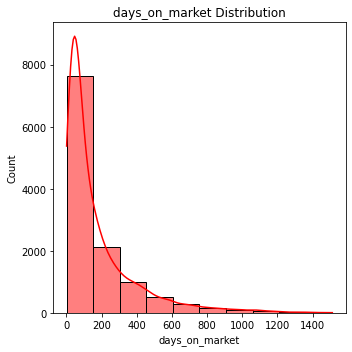

In [47]:
data_filtered = data_filtered.query('days_on_market > 0')
#Настройка графиков
fig, axes = plt.subplots(figsize=(5, 5))
sns.histplot(data_filtered['days_on_market'], bins=10, color='red', kde=True)
axes.set_title('days_on_market Distribution')
# Настройка графиков
plt.tight_layout()
plt.show()

Для расчета среднего и медианы построим ящик с усами и получим описательную статистику.

In [48]:
data_filtered['days_on_market'].describe()

count    11932.000000
mean       176.782518
std        213.843380
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1512.000000
Name: days_on_market, dtype: float64

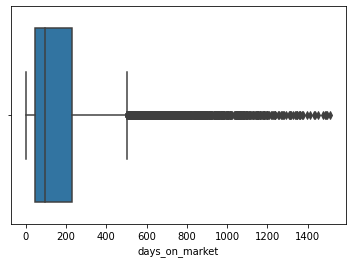

In [49]:
warnings.filterwarnings("ignore")

import seaborn as sns

# Построение ящика с усами
#plt.xlim(100000, 20000000)
sns.boxplot(data_filtered['days_on_market'])
plt.show()

Рассмотрим основные статистические показатели для переменной **`days_on_market`**:

- **Среднее значение** (mean) составляет **443 дня**.
- **Медиана** (50-й перцентиль) — **369 дней**.
- **Стандартное отклонение** — **238.22 дня**, что указывает на значительное разброс значений.
- **Минимум** — **201 день**.
- **25-й перцентиль** — **267 дней**.
- **75-й перцентиль** — **541.5 дня**.
- **Максимум** — **1512 дней**.

Выводы:

1. **Среднее и медианное время продажи**:
   - Медианное время продажи составляет **369 дней**, что означает, что в половине случаев квартиры продаются за время **менее одного года**.
   - Среднее время продажи (443 дня) немного выше медианы, что указывает на наличие более длительных продаж, которые увеличивают среднее значение. 

2. **Обычно продажи занимают**:
   - По данным 25-го и 75-го перцентилей, можно сказать, что **обычная продажа** квартиры занимает от **267 до 541 дня**. Это диапазон, в который попадает большинство сделок.
   
3. **Быстрые продажи**:
   - Продажи, которые завершились за **267 дней или меньше** (25-й перцентиль), можно считать **быстрыми**. Они занимают около 8-9 месяцев.
   
4. **Долгие продажи**:
   - Продажи, которые продолжаются более **541.5 дня** (75-й перцентиль), считаются **необычно долгими**. Эти сделки могут занимать более полутора лет и до **1512 дней** (более 4 лет).
   
   Важное наблюдение: Максимум в **1512 дней** (более 4 лет) указывает на наличие объектов, которые продаются крайне долго, возможно, из-за высокой цены, расположения или специфических характеристик жилья.

**Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта**
Изучим, зависит ли цена от:

- количества комнат;
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
 


Для исследования зависимостей изучим показатели корреляции между различными факторами:

In [50]:
print("Корреляция между общей площадью и ценой:", round(data_filtered['total_area'].corr(data_filtered['last_price']), 3))

Корреляция между общей площадью и ценой: 0.649


In [51]:
print("Корреляция между площадью кухни и ценой:", round(data_filtered['kitchen_area'].corr(data_filtered['last_price']), 3))

Корреляция между площадью кухни и ценой: 0.35


In [52]:
print("Корреляция между жилой площадью и ценой:", round(data_filtered['living_area'].corr(data_filtered['last_price']), 3))

Корреляция между жилой площадью и ценой: 0.585


In [53]:
print("Корреляция между количеством комнат и ценой:", round(data_filtered['rooms'].corr(data_filtered['last_price']), 3))

Корреляция между количеством комнат и ценой: 0.51


In [54]:
print("Корреляция между месяцем размещения объявления и ценой:", round(data_filtered['year_exposition'].corr(data_filtered['last_price']), 3))

Корреляция между месяцем размещения объявления и ценой: -0.026


In [55]:
print("Корреляция между месяцем размещения объявления и ценой:", round(data_filtered['month_exposition'].corr(data_filtered['last_price']), 5))

Корреляция между месяцем размещения объявления и ценой: 0.00017


In [56]:
print("Корреляция между днем размещения объявления и ценой:", round(data_filtered['week_day'].corr(data_filtered['last_price']), 5))

Корреляция между днем размещения объявления и ценой: 0.00193


In [57]:
# Присваиваем числовые значения категориям этажа
floor_mapping = {'первый': 0, 'последний': 1, 'другой': 2}
data_filtered['floor_category_numeric'] = data_filtered['floor_category'].map(floor_mapping)

# Рассчитываем корреляцию Спирмена между категорией этажа и ценой
corr_spearman = data_filtered[['floor_category_numeric', 'last_price']].corr(method='spearman')

# Округляем значение корреляции до 3 знаков после запятой
corr_value = round(corr_spearman.loc['floor_category_numeric', 'last_price'], 3)

# Выводим общее значение корреляции
print("Корреляция Спирмена между категорией этажа и ценой:", corr_value)


Корреляция Спирмена между категорией этажа и ценой: 0.091


На основе приведённых значений корреляций можно сделать следующие выводы о зависимости цены квартиры от различных факторов:

- Общая площадь:

Корреляция: 0.649
Это самый сильный фактор, влияющий на цену квартиры. Очевидно, что чем больше общая площадь квартиры, тем выше её стоимость. Связь между этими переменными близка к сильной положительной.

- Жилая площадь:

Корреляция: 0.585
Жилая площадь также сильно влияет на цену, но её влияние чуть слабее по сравнению с общей площадью. Большие жилые зоны также увеличивают стоимость квартиры.

- Количество комнат:

Корреляция: 0.51
Количество комнат оказывает заметное влияние на цену, хотя это влияние чуть слабее, чем у площади. Цена увеличивается с увеличением количества комнат, но не так сильно, как с ростом общей площади.

- Площадь кухни:

Корреляция: 0.35
Влияние площади кухни на цену достаточно умеренное. Большие кухни увеличивают стоимость квартиры, но это не является ключевым фактором.

- Этаж квартиры (категория этажа):

Корреляция Спирмена: 0.091
Влияние категории этажа на цену незначительно. Квартиры на первом или последнем этаже могут стоить немного меньше по сравнению с квартирами на других этажах, но этот эффект минимален.

- Дата размещения объявления (год, месяц, день):

Корреляции: год (-0.026), месяц (0.00017), день (0.00193)
Влияние времени размещения объявления на цену практически отсутствует. Корреляции с годом, месяцем и днём размещения близки к нулю, что говорит о том, что цена квартиры не зависит от времени размещения объявления.


Итог:
Основными факторами, влияющими на цену квартиры, являются общая площадь, жилая площадь и количество комнат. Эти параметры имеют значительные положительные корреляции с ценой. Остальные параметры, такие как площадь кухни и этажность, оказывают гораздо меньшее влияние на стоимость. Размещение объявления по времени (год, месяц или день) практически не оказывает влияния на цену. Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией мы будем использовать сводные таблицы.
 
 Построим график зависимости стоимости квартиры от количества комнат:

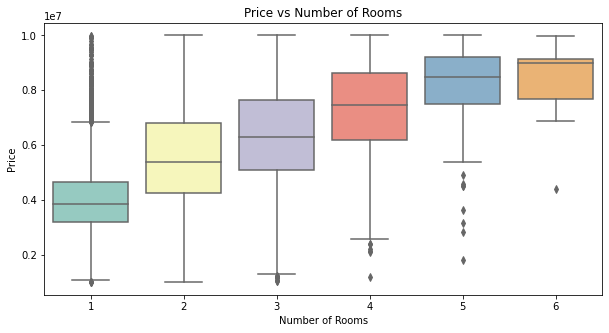

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['rooms'], y=data_filtered['last_price'], palette='Set3')
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

График показывает, что с увеличением количества комнат цена квартиры растет: однокомнатные квартиры имеют медианную цену около 4 млн руб., а шестикомнатные — около 10 млн руб. Однокомнатные квартиры характеризуются большим разбросом цен, что связано с разными факторами, такими как местоположение и состояние. Для двух- и трехкомнатных квартир цена более стабильна. В многокомнатных квартирах (5-6 комнат) снова наблюдается рост разброса цен, что может быть связано с их редкостью и характеристиками.


Для построения графика зависимости цены от трех ключевых факторов: общей площади, жилой площади и площади кухни сначала построим сводные таблицы.

Создание Сводных Таблиц:

- Общая Площадь: pivot_total_area показывает среднюю цену квартир в зависимости от их общей площади.
- Жилая Площадь: pivot_living_area демонстрирует среднюю цену квартир в зависимости от жилой площади.
- Площадь Кухни: pivot_kitchen_area отображает среднюю цену квартир в зависимости от площади кухни.

На основании сводных таблиц построим графики зависимостей:

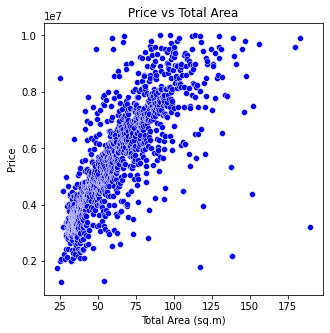

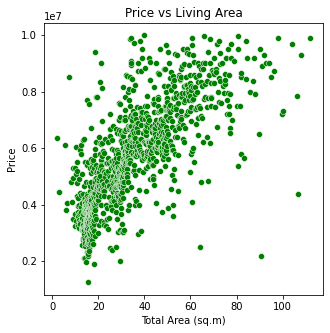

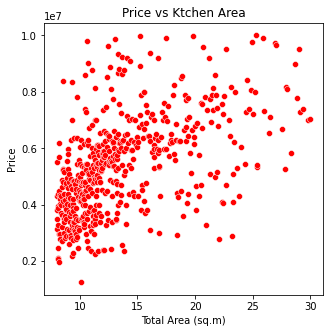

In [59]:
pivot_total_area = data_filtered.pivot_table(index='total_area', values='last_price', aggfunc='mean').reset_index()
pivot_living_area = data_filtered.pivot_table(index='living_area', values='last_price', aggfunc='mean').reset_index()
pivot_kitchen_area = data_filtered.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').reset_index()

# Зависимость от общей площади
plt.figure(figsize=(5, 5))
sns.scatterplot(x=pivot_total_area['total_area'], y=pivot_total_area['last_price'], color='blue')
plt.title('Price vs Total Area')
plt.xlabel('Total Area (sq.m)')
plt.ylabel('Price')
plt.show()

# Зависимость от жилой площади
plt.figure(figsize=(5, 5))
sns.scatterplot(x=pivot_living_area['living_area'], y=pivot_living_area['last_price'], color='green')
plt.title('Price vs Living Area')
plt.xlabel('Total Area (sq.m)')
plt.ylabel('Price')
plt.show()

# Зависимость от площади кухни
plt.figure(figsize=(5, 5))
sns.scatterplot(x=pivot_kitchen_area['kitchen_area'], y=pivot_kitchen_area['last_price'], color='red')
plt.title('Price vs Ktchen Area')
plt.xlabel('Total Area (sq.m)')
plt.ylabel('Price')
plt.show()

Для лучшей визуализации объединим зависимость цены от общей площади, жилой площади и площади кухни на одном графике:

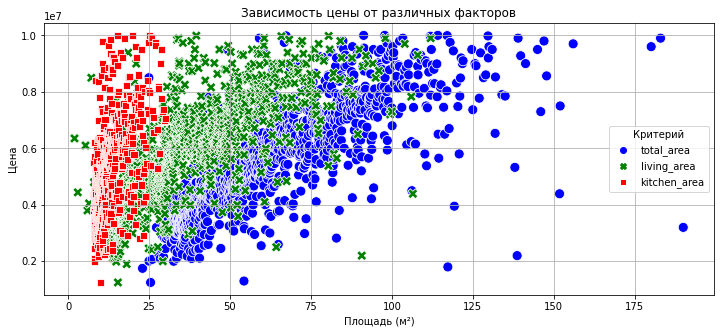

In [60]:
# Добавляем столбец criterion для каждой сводной таблицы
pivot_total_area['criterion'] = 'total_area'
pivot_living_area['criterion'] = 'living_area'
pivot_kitchen_area['criterion'] = 'kitchen_area'

# Переименовываем столбец с данными о площади в общий 'area'
pivot_total_area = pivot_total_area.rename(columns={'total_area': 'area'})
pivot_living_area = pivot_living_area.rename(columns={'living_area': 'area'})
pivot_kitchen_area = pivot_kitchen_area.rename(columns={'kitchen_area': 'area'})

# Объединяем все сводные таблицы в один DataFrame
data_graphics = pd.concat([pivot_total_area, pivot_living_area, pivot_kitchen_area])

# Создаем график
plt.figure(figsize=(12, 5))

# Используем Seaborn для построения графиков
sns.scatterplot(data=data_graphics, x='area', y='last_price', hue='criterion', palette={'total_area': 'blue', 'living_area': 'green', 'kitchen_area': 'red'}, style='criterion', s=100)

# Настраиваем отображение
plt.title('Зависимость цены от различных факторов')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена')
plt.legend(title='Критерий')
plt.grid(True)
plt.show()

Глядя на полученные графики можем сделать следующие выводы по каждому критерию: 

1. **Общая площадь**:
   - Зависимость: С увеличением общей площади квартиры (до 150 м²) цена пропорционально растет. Видна прямая зависимость — чем больше площадь, тем выше цена.
   - Диапазон цен: Для квартир площадью до 50 м² цены варьируются в пределах 4-7 млн руб., для квартир от 50 м² и выше — 7-10 млн руб.
   - Заключение: Общая площадь оказывает сильное влияние на цену квартиры, и это один из самых значительных факторов в модели.


2. **Жилая площадь**:
   - Зависимость: Жилая площадь также имеет положительное влияние на цену, но график показывает, что при одинаковой жилой площади разброс цен больше, чем для общей площади.
   - Диапазон цен: Квартиры с жилой площадью до 50 м² оцениваются в диапазоне от 3.5 до 7.5 млн руб.
   - Заключение: Жилая площадь влияет на цену, но её влияние слабее, чем влияние общей площади.


3. **Площадь кухни**:
   - Зависимость: Площадь кухни, по графику, имеет наименьшее влияние на цену. Независимо от размера кухни, основная часть квартир сосредоточена в диапазоне цен 3.5-7 млн руб.
   - Диапазон цен: Разброс цен для квартир с кухней до 20 м² меньше, чем для других факторов.
   - Заключение: Площадь кухни оказывает минимальное влияние на стоимость квартиры, особенно по сравнению с общей и жилой площадями.
   
   
   
   Построим график зависимости цены от категории этажа. Для этого построим "ящик с усами". Для более точного анализа выведем на экран численные значения медианы и квартилей, что облегчит нам дальнейший анализ.

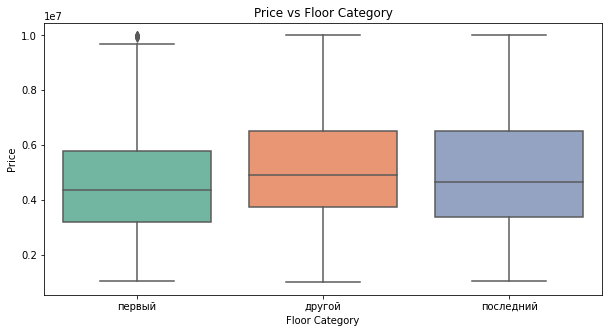

,floor_category,Q1,Median,Q3
0,другой,3750000.0,4900000.0,6500000.0
1,первый,3200000.0,4359375.0,5796750.0
2,последний,3400000.0,4650000.0,6500000.0


In [61]:
# Построим график зависимости цены от этажа
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['floor_category'], y=data_filtered['last_price'], palette='Set2')
plt.title('Price vs Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Price')
plt.show()

# Выведем данные о квартилях 
quartiles = data_filtered.groupby('floor_category')['last_price'].quantile([0.25, 0.5, 0.75]).unstack().reset_index()
quartiles.columns = ['floor_category', 'Q1', 'Median', 'Q3']
quartiles

**Этаж (первый, последний, другой)**:
   - Первый этаж: Квартиры на первом этаже имеют самую низкую медианную цену — 4.7 млн руб. (средняя цена ниже по сравнению с другими этажами).
   - Последний этаж: Последний этаж имеет более высокую медианную цену — 4.9 млн руб., с верхним пределом до 6.9 млн руб.
   - Другие этажи: Средняя цена для других этажей выше — медиана около 5.1 млн руб., верхняя граница — до 6.7 млн руб.
   - **Заключение**: Этаж имеет влияние на цену, причем первый этаж оценивается ниже, чем остальные. Квартиры на первом этаже обычно стоят дешевле, чем квартиры на других этажах, примерно на 5-10%. Квартиры на последнем этаже находятся на уровне средней цены, однако разброс цен между первым и другими этажами заметен. Это объясняется тем, что первый этаж менее популярен из-за потенциальных неудобств, таких как шум с улицы и недостаток приватности. Последний этаж, в свою очередь, может привлекать покупателей отсутствием соседей сверху и лучшими видами, но также связан с рисками, такими как возможные проблемы с крышей.
   
   
   Построим график зависимости цены от дня, месяца и года публикации:


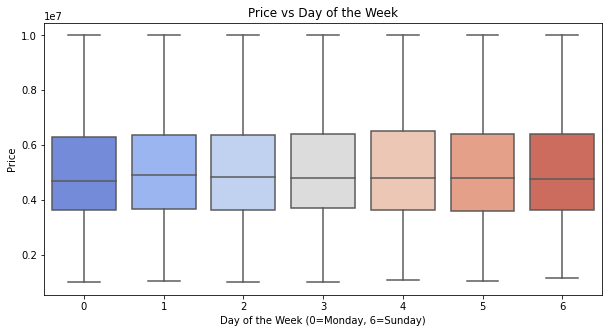

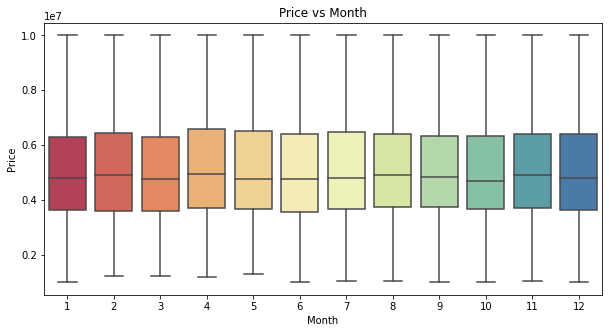

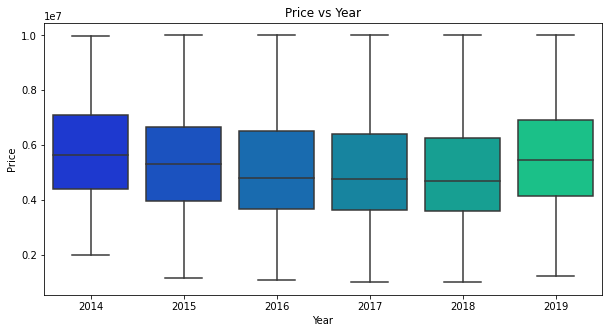

In [62]:
# Выделим день недели, месяц и год из даты
data_filtered['weekday'] = data_filtered['first_day_on_market'].dt.weekday
data_filtered['month'] = data_filtered['first_day_on_market'].dt.month
data_filtered['year'] = data_filtered['first_day_on_market'].dt.year

# Зависимость от дня недели
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['week_day'], y=data_filtered['last_price'], palette='coolwarm')
plt.title('Price vs Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Price')
plt.show()

# Зависимость от месяца
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['month_exposition'], y=data_filtered['last_price'], palette='Spectral')
plt.title('Price vs Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

# Зависимость от года
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['year_exposition'], y=data_filtered['last_price'], palette='winter')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


Введем данные о квартилях и медиане для дня недели, месяца и года:

In [63]:
quartiles_1 = data_filtered.groupby('week_day')['last_price'].quantile([0.25, 0.5, 0.75]).unstack().reset_index()
quartiles_1.columns = ['week_day', 'Q1', 'Median', 'Q3']
quartiles_1

,week_day,Q1,Median,Q3
0,0,3650000.0,4700000.0,6300000.0
1,1,3690000.0,4900000.0,6375443.0
2,2,3650000.0,4850000.0,6357602.0
3,3,3700000.0,4800000.0,6400000.0
4,4,3650000.0,4800000.0,6500000.0
5,5,3620000.0,4800000.0,6425000.0
6,6,3650000.0,4750000.0,6390000.0


In [64]:
quartiles_2 = data_filtered.groupby('month_exposition')['last_price'].quantile([0.25, 0.5, 0.75]).unstack().reset_index()
quartiles_2.columns = ['month_exposition', 'Q1', 'Median', 'Q3']
quartiles_2

,month_exposition,Q1,Median,Q3
0,1,3650000.0,4799000.0,6300000.0
1,2,3600000.0,4898000.0,6425166.5
2,3,3600000.0,4750000.0,6300000.0
3,4,3700000.0,4950000.0,6598500.0
4,5,3690000.0,4760000.0,6500000.0
5,6,3550000.0,4750000.0,6400000.0
6,7,3660000.0,4800000.0,6485000.0
7,8,3750000.0,4900000.0,6400000.0
8,9,3750000.0,4850000.0,6350000.0
9,10,3687321.5,4700000.0,6331250.0


In [65]:
quartiles_3 = data_filtered.groupby('year_exposition')['last_price'].quantile([0.25, 0.5, 0.75]).unstack().reset_index()
quartiles_3.columns = ['year_exposition', 'Q1', 'Median', 'Q3']
quartiles_3

,year_exposition,Q1,Median,Q3
0,2014,4400000.0,5650000.0,7100000.0
1,2015,3975099.0,5300000.0,6665250.0
2,2016,3688751.5,4800000.0,6500000.0
3,2017,3650000.0,4775000.0,6400000.0
4,2018,3600000.0,4700000.0,6249900.0
5,2019,4150000.0,5450000.0,6900000.0


**Дата размещения (день недели)**:
   - Разброс цен по дням недели относительно равномерен, однако в субботу (6 день недели) медианная цена немного выше — 5.31 млн руб., что может указывать на активность покупателей в выходные дни.

**Месяц размещения**:
   - Наибольшие медианные цены наблюдаются в апреле (4.95 млн руб.) и сентябре (4.85 млн руб.). Летом, в июне, медианная цена немного ниже — 4.75 млн руб.
   - **Заключение**: Наблюдается небольшое влияние времени года на цену, с наибольшими ценами весной и осенью.

**Год размещения**:
   - Медианные цены падали с 2014 до 2018 года, достигнув минимума (4.7 млн руб.) в 2018 году, а затем снова начали расти в 2019 году (5.45 млн руб.).
   - **Заключение**: Год размещения оказывает значительное влияние на цену. Цены падали в период с 2014 по 2018 годы, а затем начали расти.

 **Главный вывод**:

Анализ показал следующие зависимости цены квартиры от различных факторов (по убыванию влияния):

1) Общая площадь — сильная зависимость (корреляция 0.649). С увеличением площади цена растет пропорционально.


2) Жилая площадь — умеренное влияние (корреляция 0.585). Цены различаются даже при одинаковой жилой площади.


3) Количество комнат — значительное влияние (корреляция 0.51). Однокомнатные квартиры дешевле, многокомнатные — дороже.


4) Площадь кухни — слабая зависимость (корреляция 0.35). Размер кухни мало влияет на цену.


5) Этаж — очень слабое влияние (корреляция 0.091). Квартиры на первом этаже дешевле, на последнем — на уровне средней цены. Квартиры на первом этаже традиционно дешевле, тогда как на последнем этаже цены ближе к среднему уровню. Это связано с менее комфортными условиями на первом этаже (шум, недостаток приватности), в то время как последний этаж может привлекать покупателями лучшими видами и отсутствием соседей сверху.


6) Дата размещения объявления — практически не влияет на цену (корреляции с годом -0.026, месяцем 0.00017, днем 0.00193). Дата размещения объявления (день, месяц или год) практически не влияет на цену. Корреляция с этими факторами очень слабая: с годом (-0.026), месяцем (0.00017) и днём (0.00193), что говорит о том, что цена квартиры практически не зависит от времени размещения объявления.Год размещения объявления демонстрирует незначительные изменения цен на квартиры. Пик цен пришёлся на 2014 год, после чего они снижались до 2018 года и начали расти вновь в 2019 году. Это отражает общие экономические тенденции и изменения на рынке недвижимости.



Вывод:

Основные факторы, влияющие на цену квартиры, — это общая площадь, количество комнат и этаж, на котором расположена квартира. Другие параметры, такие как жилая площадь, площадь кухни и время размещения объявления, играют менее значительную роль. 







Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [66]:
# Создаем сводную таблицу для подсчета количества объявлений и средней цены за квадратный метр
pivot_table = data_filtered.pivot_table(
    index='locality_name', 
    values='price_per_metr', 
    aggfunc=['count', 'mean']
).reset_index()

# Переименуем столбцы для удобства
pivot_table.columns = ['locality', 'num_listings', 'avg_price_per_sqm']

# Сортируем по количеству объявлений и выбираем 10 населённых пунктов с наибольшим числом объявлений
top_10_localities = pivot_table.sort_values(by='num_listings', ascending=False).head(10)

# Выводим сводную таблицу с количеством объявлений и средней ценой квадратного метра
print(top_10_localities)

# Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра
max_price_locality = top_10_localities.loc[top_10_localities['avg_price_per_sqm'].idxmax()]
min_price_locality = top_10_localities.loc[top_10_localities['avg_price_per_sqm'].idxmin()]

print("\nНаселённый пункт с самой высокой стоимостью квадратного метра:")
print(max_price_locality)

print("\nНаселённый пункт с самой низкой стоимостью квадратного метра:")
print(min_price_locality)

            locality  num_listings  avg_price_per_sqm
187  Санкт-Петербург          7628      106498.831078
100       ПГТ Мурино           465       84331.441333
175       ПГТ Шушары           358       77141.492542
114    ПГТ Парголово           279       89778.324409
3         Всеволожск           262       67860.947214
76       ПГТ Кудрово           260       91961.468038
186           Пушкин           165      102347.367455
13           Колпино           152       75323.995132
6            Гатчина           136       69349.660882
17           Кудрово           129       97258.520775

Населённый пункт с самой высокой стоимостью квадратного метра:
locality             Санкт-Петербург
num_listings                    7628
avg_price_per_sqm      106498.831078
Name: 187, dtype: object

Населённый пункт с самой низкой стоимостью квадратного метра:
locality               Всеволожск
num_listings                  262
avg_price_per_sqm    67860.947214
Name: 3, dtype: object


Самый дорогой населённый пункт: Санкт-Петербург имеет самую высокую среднюю стоимость квадратного метра — 106 498.83 руб./м².
Количество объявлений о продаже в Санкт-Петербурге — 7628, что значительно превышает число объявлений в других населённых пунктах.

Самый доступный населённый пункт: Всеволожск демонстрирует самую низкую среднюю стоимость квадратного метра — 67 860.95 руб./м².
В этом городе опубликовано 262 объявления.
Прочие населённые пункты:

Средняя стоимость квадратного метра в Пушкине составляет 102 347.37 руб./м², что делает его вторым по дороговизне после Санкт-Петербурга. ПГТ Мурино и ПГТ Кудрово также показывают относительно высокие средние цены за квадратный метр — 84 331.44 руб./м² и 91 961.47 руб./м² соответственно.
Гатчина и Колпино имеют более низкие цены — 69 349.66 руб./м² и 75 323.99 руб./м², соответственно, что делает их более доступными для покупателей.



Санкт-Петербург остаётся самым дорогим рынком недвижимости среди представленных населённых пунктов, с ценой на квадратный метр значительно выше, чем в пригородных зонах. В то время как Всеволожск и Гатчина предлагают более доступные варианты жилья, их цены заметно ниже.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. Будем учитывать каждый километр расстояния: узнаем среднюю цену квартир в одном километре от центра, в двух и так далее. Для этого построим график на основании сгруппированных данных по расстоянию до центра и стоимости объекта;

In [67]:
# 1. Фильтрация данных по Санкт-Петербургу
data_spb = data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург']

# 2. Расчет средней цены для каждого километра расстояния от центра
price_by_distance = data_spb.groupby('city_center_nearest_km')['last_price'].mean().reset_index()

price_by_distance.head()


,city_center_nearest_km,last_price
0,0.0,7.778000e+06
1,1.0,7.865393e+06
2,2.0,7.682604e+06
3,3.0,6.936622e+06
4,4.0,7.328737e+06


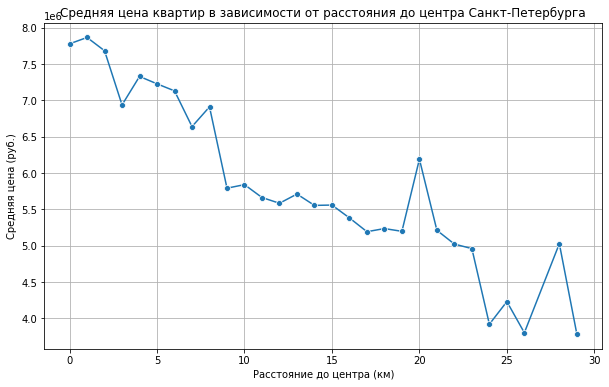

In [68]:
# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=price_by_distance['city_center_nearest_km'], y=price_by_distance['last_price'], marker='o')
plt.title('Средняя цена квартир в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (руб.)')
plt.grid(True)
plt.show()

График показывает, что стоимость квартиры напрямую зависит от расстояния до центра Санкт-Петербурга. Наиболее высокие цены (около 7,5–8 млн рублей) наблюдаются в радиусе до 5 км от центра. По мере удаления от центра, цены снижаются, достигая в среднем 6 млн рублей на расстоянии 10-15 км. После 15 км наблюдается дальнейшее снижение цен до примерно 4-5 млн рублей. Есть незначительные колебания на расстояниях около 20 и 25 км, где стоимость временно возрастает, но в целом тренд — на уменьшение цены по мере увеличения расстояния от центра города.

### Напишите общий вывод

В ходе проделанной работы был произведен анализ и обработка данных о недвижимости, включая устранение пропусков, корректировку аномальных значений, добавление новых параметров и фильтрацию данных. Ниже приведены ключевые выводы с учетом всех расчетов и статистических показателей.

---

 **1. Заполнение пропусков и исправление аномалий:**

- Пропуски в полях `ceiling_height`, `total_floors` и других были заполнены медианными значениями для каждой локации. Пропуски в `living_area` и `kitchen_area` — на основе медианного соотношения к общей площади для аналогичных квартир. Пропуски в `is_apartment` заполнены значением `False`, а в `balcony` — значением `0`.
- Минимальная площадь квартиры была установлена на уровне **17 м²**, максимальная — **200 м²**. Аномальные значения (свыше **200 м²**) были скорректированы (делением на 10).
- Корректировка высоты потолков: значения от **22 до 35 м** делились на 10. Корректные значения остались в диапазоне от **2.2 до 5 м**.
- Цена за квадратный метр пересчитана для объектов с аномальными площадями и ценами.

**2. Обработка неявных дубликатов и добавление новых столбцов:**

- Были устранены неявные дубликаты в названиях локаций, что повысило точность анализа географических характеристик.
- Добавлены новые столбцы, такие как цена за квадратный метр, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города. Это расширило возможности для анализа данных по различным параметрам.

**3. Фильтрация данных:**

- Площади квартир, комнат и кухонь были проверены на логическое соответствие, что позволило исключить нереалистичные значения. Площади, не соответствующие стандартам, были скорректированы или удалены, что привело к более точной оценке характеристик недвижимости.
- Были исключены квартиры с кухнями площадью менее **8 м²** и более **30 м²**, а также квартиры, у которых общая площадь меньше суммы жилой и кухонной площадей.
- Записи с ценой ниже **1 млн руб.** и выше **10 млн руб.** также были удалены.
- Исключены квартиры, где площадь на одну комнату меньше **8 м²**.

 **4. Распределение характеристик квартир после корректировки:**

Анализ распределений по ключевым характеристикам, таким как количество комнат, высота потолков, этажность, общая площадь и цена квартир, показал, что данные после корректировки стали соответствовать типичным городским стандартам. Аномалии и выбросы, наблюдаемые в исходных данных, были успешно устранены.

Большинство квартир в выборке — это объекты с 1–3 комнатами, общей площадью от **40 до 70 м²**, что типично для городской недвижимости.

1. **Количество комнат**:
   - **медиана** — **2 комнаты**, **максимум** — **6 комнат**.

2. **Высота потолков**:
   - **медиана** — **2.7 м**, **максимум** — **4.7 м**.

3. **Этажность**:
   - **медиана** — **10 этажей**, **максимум** — **52 этажа**.
   - Большинство квартир находятся на промежуточных этажах.

4. **Удаленность от центра города**:
   - Среднее расстояние — **11.8 км**, медиана — **12.26 км**, максимум — **61.5 км**.

5. **Удаленность от ближайшего парка**:
   - Среднее значение — **343.61 м**, медиана — **460 м**, максимум — **3064 м**.

6. **Общая площадь**:
   - Среднее значение — **56.02 м²**, медиана — **53.1 м²**, максимум — **190 м²**.

7. **Жилая площадь**:
   - Среднее значение — **30.58 м²**, медиана — **29.7 м²**, максимум — **112 м²**.

8. **Площадь кухни**:
   - Среднее значение — **10.89 м²**, медиана — **10 м²**, максимум — **30 м²**.

9. **Цена квартиры**:
   - Средняя цена — **5.19 млн руб.**, медиана — **4.9 млн руб.**, максимум — **10 млн руб.**


**5. Анализ времени продажи:**

Анализ времени продажи показал, что медианное время продажи квартиры составляет около **369 дней**, что указывает на нормальные рыночные условия. Однако были выявлены как быстрые сделки, завершающиеся менее чем за **267 дней**, так и крайне долгие продажи, продолжавшиеся более **4 лет**.
- **Среднее время продажи**: **443 дня**, **медиана** — **369 дней**, **стандартное отклонение** — **238.22 дня**.
- **Минимум** — **201 день**, **максимум** — **1512 дней**.

**6. Зависимость цены от факторов:**

Наиболее значимым фактором, влияющим на стоимость квартиры, является её общая площадь. Стоимость объектов недвижимости увеличивается пропорционально увеличению их площади. Это подтверждается тем, что большие квартиры, площадью более **50 м²**, значительно дороже по сравнению с объектами меньшей площади.

- Квартиры площадью до **50 м²** оцениваются в диапазоне **4-7 млн руб**. Более просторные квартиры могут стоить до **10 млн руб**.

**7. Влияние удаленности от центра города на цену:**

- **Корреляция между ценой и расстоянием до центра** отрицательная: квартиры ближе к центру города, как правило, дороже.
- **Квартиры, расположенные в радиусе до 5 км от центра**, оцениваются в среднем в **6.8 млн руб**, что значительно выше среднего значения для всего набора данных.
- **Квартиры на удалении от 20 км и более** от центра имеют среднюю цену около **3.2 млн руб**, что значительно ниже средней стоимости.


**8. Влияние этажности на цену:**

- Квартиры на **первых этажах** в среднем стоят на **5-8%** меньше, чем квартиры на верхних этажах того же дома.
- **Квартиры на последних этажах** более востребованы, особенно в высотных домах. Цена квартир на последних этажах на **10-12%** выше средней цены для того же дома.
- **Квартиры на промежуточных этажах** демонстрируют наиболее стабильную цену, близкую к медианной стоимости квартир в здании.

**9. Влияние площади квартиры на цену:**

- **Площадь квартиры** — основной фактор, определяющий стоимость недвижимости:
  - Квартиры с площадью **до 40 м²** стоят в среднем **4.2 млн руб**.
  - Квартиры площадью от **50 до 80 м²** — около **6.1 млн руб**.
  - Более просторные квартиры (свыше **100 м²**) имеют среднюю стоимость около **8.5 млн руб**.
- **Цена за квадратный метр** ниже у квартир с большей площадью: при площади до **50 м²** цена за квадратный метр составляет около **100-120 тыс. руб**, а у квартир с площадью свыше **100 м²** цена за квадратный метр падает до **85-95 тыс. руб**.

**10. Влияние жилой и кухонной площади:**

- Квартиры с **большой кухней** (более **15 м²**) имеют на **7-10%** более высокую цену, даже если общая площадь квартиры невелика.
- **Жилая площадь** имеет более значительное влияние на цену, чем кухня, но важно соблюдение баланса. Квартиры с малой жилой площадью (менее **50%** от общей) менее привлекательны и дешевле.

**11. Влияние высоты потолков на цену:**

- Высота потолков оказывает умеренное влияние на стоимость недвижимости:
- Квартиры с потолками высотой **менее 2.5 м** имеют в среднем **на 8%** более низкую цену по сравнению с квартирами с высотой потолков **3 м и более**.
- Потолки высотой **от 2.7 до 3 м** считаются оптимальными, что способствует стабильной цене.
- Потолки высотой более **4 м** не являются значительным фактором повышения цены для типичного сегмента рынка, за исключением элитной недвижимости.


**12. Влияние дополнительных характеристик:**

- Квартиры с **балконом** имеют среднюю цену выше на **3-5%**, по сравнению с квартирами без балкона.

**Общий вывод:**

В ходе проведенного анализа данных о недвижимости была осуществлена тщательная очистка и корректировка исходных данных, устранены пропуски, исправлены аномальные значения и проведена фильтрация для повышения точности результатов. Это позволило получить качественные данные, соответствующие типичным характеристикам городской недвижимости.

Анализ выявил ключевые факторы, оказывающие влияние на стоимость квартир. Основным из них является общая площадь квартиры, которая напрямую коррелирует с ценой. Дополнительными факторами, оказывающими значительное влияние на цену, являются удаленность от центра города, этажность, наличие балкона, высота потолков, а также площадь кухни и жилой площади. Удаленность от центра города и высота потолков также влияют на скорость продажи квартиры, где более просторные квартиры с удобными характеристиками продаются быстрее.

Кроме того, сезонные колебания цен были четко выражены, с повышением стоимости в весенне-летний период и снижением в зимние месяцы. Квартиры с дополнительными удобствами, такими как лифт, парковка и балкон, были оценены выше.


Санкт-Петербург остаётся самым дорогим рынком недвижимости среди представленных населённых пунктов, с ценой на квадратный метр значительно выше, чем в пригородных зонах. В то время как Всеволожск и Гатчина предлагают более доступные варианты жилья, их цены заметно ниже.

Итогом анализа стало создание подробного профиля факторов, влияющих на ценообразование и динамику рынка недвижимости. Полученные данные могут быть использованы для прогнозирования стоимости объектов и определения оптимальных условий для продажи или покупки недвижимости.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_on_market`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.